In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('WorldIndex.csv')

In [2]:
#数据预处理，处理空值
new_data=data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [3]:
#导入画图包
import matplotlib.pyplot as plt 

Text(0.5,1,'Life Histogram')

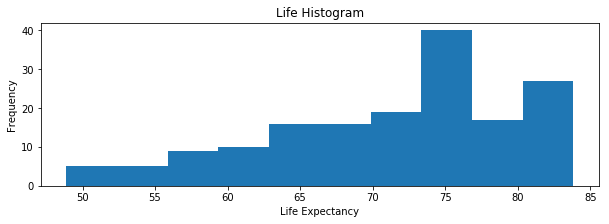

In [4]:
#人均寿命直方图
lifeData = new_data["Life_expectancy"]

fig, ax = plt.subplots(1,1,figsize=(10, 3))
#直方图
ax.hist(lifeData) 
ax.set_ylabel("Frequency")
ax.set_xlabel("Life Expectancy")
ax.set_title("Life Histogram")

Text(0.5,0,'GDP')

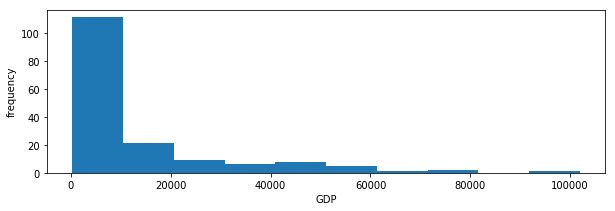

In [5]:
#人均GDP直方图
gdpData = new_data["GDP_per_capita"]
fig, ax = plt.subplots(1,1,figsize=(10, 3))
ax.hist(gdpData) 
ax.set_ylabel("frequency")
ax.set_xlabel("GDP")

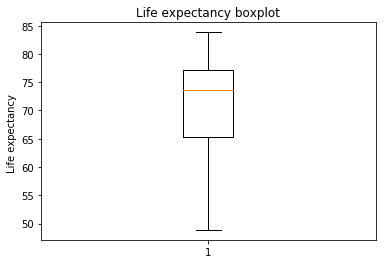

In [6]:
#人均寿命箱线图
plt.boxplot(x=new_data.Life_expectancy)
plt.ylabel("Life expectancy ")
plt.title("Life expectancy boxplot")
plt.show()

In [7]:
#各大洲国家个数条形图
datasetCountry = new_data["Continent"]
list1 = datasetCountry.values.tolist()
continent = dict(zip(*np.unique(list1, return_counts=True)))
continent

{'Africa': 48,
 'Asia': 36,
 'Europe': 41,
 'North America': 19,
 'Oceania': 9,
 'South America': 11}

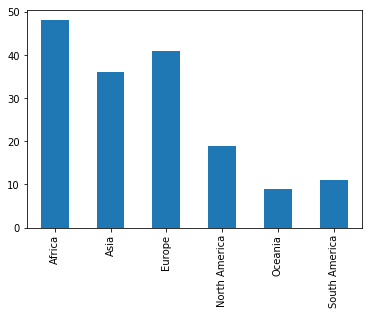

In [8]:
continent = pd.Series(continent)
continent.plot(kind='bar')

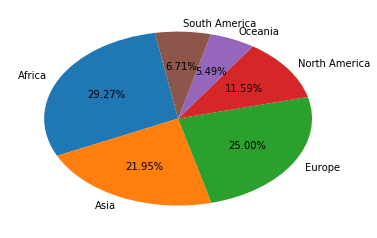

In [9]:
#绘制各大洲国家数量占比的饼图
plt.pie(continent,labels=continent.index,autopct='%.2f%%',shadow=False,startangle=100)
plt.show()

Text(0.5,1,'scatter diagram')

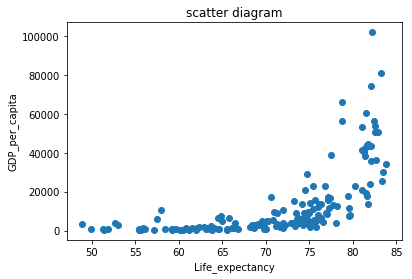

In [10]:
#人均寿命和人均GDP散点图
plt.scatter(x=new_data.Life_expectancy,y=new_data.GDP_per_capita)
plt.xlabel('Life_expectancy')
plt.ylabel('GDP_per_capita')
plt.title('scatter diagram')

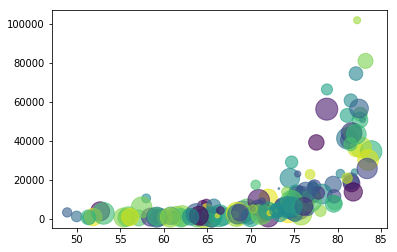

In [11]:
#气泡图
#先定义气泡大小，rank 函数将大小列进行大小分配，越大的值分配结果也越高
#n 为倍数，用来调节气泡的大小，且看后头
size=new_data['Population'].rank()
n=3
colors = np.random.rand(len(new_data.Country)) 
plt.scatter(x=new_data.Life_expectancy,y=new_data.GDP_per_capita,s=size*n,alpha=0.6,c=colors)
plt.show()

In [12]:
#导入scipy
from scipy.integrate import odeint
from scipy.optimize import root,fsolve


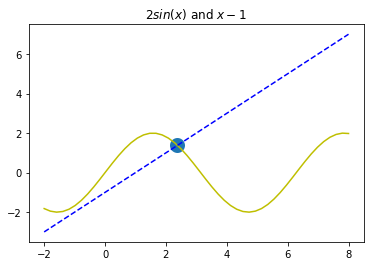

In [13]:
#求解方程
#1.f(x)=2*sin(x)-x+1
x1 = np.linspace(-2,8)
y1_1,y1_2 = 2*np.sin(x1),x1-1
plt.figure(1)
plt.plot(x1,y1_1,'y',x1,y1_2,'b--')
plt.title('$2sin(x)$ and $x-1$')

def f(x):
    return np.sin(x)*2-x+1

sol1_root = root(f,[2])
sol1_fsolve = fsolve(f,[2])
plt.scatter(sol1_fsolve,2*np.sin(sol1_fsolve),linewidths=9)
plt.show()

In [14]:
#求解线性方程组{3X1+2X2=3;X1-2X2=5}
from sympy import *
x1 = Symbol('x1')
x2 = Symbol('x2')
print(solve([3 * x1 + 2*x2 - 3, x1 - 2*x2 - 5],[x1, x2]))

{x1: 2, x2: -3/2}
